![title](http://radiografia.conare.ac.cr/static/images/logos/una.png)

<h1>
<p><center>Universidad Nacional</center></p>
<p><center>Escuela de Informática</center></p>
<p><center>ESTRUCTURAS DE DATOS</center></p>
<p><center>Proyecto - Calculadora</center></p>
</h1>

<h2>
<p><center>Profesor: Jose Pablo Calvo</center></p>
<p><center>Grupo 3:00 p.m</center></p>
</h2>

<h3>
<p><center>Integrantes:</center></p>
<p><center>117460708 Gonzalo González Garro</center></p>
<p><center>117550063 Erick Vargas Arias</center></p>
</h3>

<h2>
<p><center>Campus Benjamín Nuñez</center></p>
<p><center>2018</center></p>
</h2>

<h2>
<p>Introduccion</p>
</h2>

En este documento se va a dar un breve explicacion pero a fondo sobre la funcionalidad de los algoritmos que componen al programa, ademas de especificar algunas de las instrucciones y consideraciones a seguir para lograr que el programa cumpla con el objetivo adecuadamente. 

<h2><p>Utilización<p></h2>

Esta calculadora usa una implementación gráfica con las librerías de SFML.
Si se desea realizar una ejecución correcta, desde el IDE Visual Studio 2017, del programa se deben realizar los siguientes pasos:

-Seleccionar el tipo de debug a tipo x86, como lo muestra la imagen


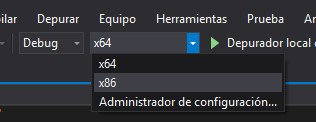

In [ ]:
void Calculadora::normalizarExpresion()

Este metodo es escencial para evitar que el usuario ingrese expresiones erroneas al capturar el flujo de entrada

Basicamente chequea el caracter anterior al ultimo que el usuario ingresa (***expresionInfija[i - 1]***)

Una de las correcciones que realiza es la de eliminar la **secuencia de dos operadores seguidos** ya que, por ejemplo, lo siguiente no tendria sentido:

$A*+B$

El metodo no dejaria que el usuario digite el $+$ antes del $*$

In [ ]:
case '+':
    if (!isdigit(expresionInfija[ultimoIndice - 1]) && expresionInfija[ultimoIndice - 1] != ')')
        expresionInfija.pop_back();

Otra correcion se refleja durante la siguiente situacion:

$A*$

...si se quiere ingresar un numero/expresion con signo **negativo**, el usuario digita el $-$ y el algoritmo inserta un $($ para dejarlo en claro:

$A*-($

In [ ]:
case '-':
    if (!isdigit(expresionInfija[ultimoIndice - 1]) && expresionInfija[ultimoIndice - 1] != ')')
        expresionInfija.push_back('(');

<span style="color:red">**NOTA IMPORTANTE: Si se quieren ingresar numeros/expresiones con signo negativo, basta con digitar el simbolo de $-$. No hace falta digitar el parentesis, ya que la calculadora lo hara automaticamente como se refleja en el caso anterior**</span>

In [ ]:
void Calculadora::validarExpresion()

Apesar de antes haberla normalizado y de ser poco probable, la expresion puede aun contener alguno de los siguientes dos errores:

Primero se definen dos variables, entre ellas una **pila**. Estas se van a utilizar para alcanzar el objetivo siguiente

In [ ]:
Pila<char> pilaDeParentesis;
int indicadorDeElementos = 0; // Si es mayor o igual a 1, la expresion es valida

- Los **parentesis estan mal anidados**, como se refleja en la siguiente expresion:

    $A+((B*C)+D$

In [ ]:
case '(':
    pilaDeParentesis.push('(');
        break;

case ')':
    if (pilaDeParentesis.estaVacia())
            throw std::string("Los parentesis no estan anidados correctamente");

    pilaDeParentesis.pop();
    break;

- Hay una **cantidad de operadores mayor o igual a la de operandos**, como se refleja en la siguiente expresion:

    $A+B+$

In [ ]:
case '+': case '*': case '/': case '^':
    indicadorDeElementos--;
        break;

default: // Si es numero
    std::string numero;
    int contadorDeDigitos = 0;

    do
        contadorDeDigitos++;
    while (isdigit(expresionInfija[i + contadorDeDigitos]));

    indicadorDeElementos++;

    i += contadorDeDigitos - 1;
    break;

In [ ]:
if (!pilaDeParentesis.estaVacia())
    throw std::string("Parentesis mal anidados");

if (indicadorDeElementos < 1)
    throw std::string("Expresion invalida");

En ambos casos, se lanza una excepcion, la cual **evita** que se siga realizando el calculo. Dicha excepcion contiene un **mensaje**, el cual se muestra en la interfaz, con el fin de informar al usuario

In [ ]:
void Calculadora::crearNotacionPostfija()

Una vez se normaliza y verifica la validez de la expresion infija ingresada por el usuario, se procede a crear la notacion **postfija** a partir de esta

In [ ]:
for (int i = 0; i < expresionInfija.size(); i++) // Se reccorre por cada caracter de la expresion infija

El algoritmo es el mismo al visto en clase, con un cambio para poder detectar numeros/expresiones con **signo negativo**, el cual verificara adicionalmente si hay un $($ despues de haber detectado un $-$, lo cual significaria que el numero/expresion siendo evaluado tiene **signo negativo**

<span style="color:red">**NOTA IMPORTANTE: Reiteramos que los numeros/expresiones con signo negativo siempre van encerradas en parentesis. Estos parentesis los agrega la calculadora de forma automatica mientras se va escribiendo la expresion, gracias al metodo ** ***normalizar()***</span>

In [ ]:
case '-': //Se chequea si el numero/expresion ha evaluar tiene signo negativo
    if (i == 0 || (!isdigit(expresionInfija[i - 1]) && expresionInfija[i - 1] != ')')) {
        expresionPostFijaTemporal << "-(";
        pilaDeOperadores.push("-(");

        continue;
        }

Una vez se evalua un $)$, se va vaciando la pila hasta encontrar un $($. Si hubiese un $-($ significa que la expresion es **negativa**, por lo que se encerrara entre **parentesis** y con un $-$ antes de ingresarla en la expresion **postfija**. Asi:

$A+-(B)$

...seria en notacion **postfija**:

$A -(B)+$

In [ ]:
long long Calculadora::realizarCalculo()

Igual que en la anterior funcion explicada, se utilizo el mismo metodo explicado en clase para la elaboracion de este ultimo algoritmo pero, de nuevo, con un ligero cambio que, tambien, nos ayuda a manejar los numeros/expresiones con **signo negativo**

Basicamente, se chequea si hay algun parentesis de apertura ($($), lo cual significaria que hay un numero **negativo** siendo evaluado. En dicho caso, se hace un **push** a la pila de un **-1**

In [ ]:
case '(':
    pila.push(-1);

Asi, una vez encontrado un parentesis de cerrado ($)$), significaria que el numero/expresion **negativo** termino de ser evaluado, por lo que se hace un **push** a la pila con los **"dos topes"** de esta, siendo uno de ellos el **-1** ingresado anteriormente. Con esto, el numero/expresion se inserta con **signo negativo** a la pila

In [ ]:
case ')':
    pila.push(pila.pop() * pila.pop()); // El tope se volvera negativo, pues se multiplicara por el -1 insertado anteriormente